In [154]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 

%matplotlib inline

## Reading and Preparing Data

Fortunately we have clean data. No need for cleaning

In [155]:
rangeOfGameNumbers = [i for i in range(1,71)]
rangeOfRedNumbers = [i for i in range(1,27)]

In [156]:
df = pd.read_csv('pb.csv')

In [157]:
print(df.head())
df.shape

        Date   A   B   C   D   E   F
0  3/14/2020   9  23  26  30  32   8
1  3/11/2020   4  29  49  50  67   2
2   3/7/2020   7  15  21  33  62  23
3   3/4/2020  18  43  58  60  68  14
4  2/29/2020  24  44  46  50  51  13


(230, 7)

In [158]:
numDf = df.drop(['Date','F'],axis=1).stack().reset_index(drop=True)
redDf = df.loc[:,'F'].reset_index(drop=True)

print(numDf.shape)
print(redDf.shape)

(1150,)
(230,)


## Analyzing Data
Lottery mathematics is used to calculate probabilities of winning or losing a lottery game. It is based heavily on combinatorics, particularly the twelvefold way and combinations without replacement.

In each game, players select five numbers from a set of 69 white balls and one number from 26 red Powerballs; the red ball number can be the same as one of the white balls. The drawing order of the five white balls is irrelevant; all tickets show the white ball numbers in ascending order. Players cannot use the drawn Powerball to match two of their white numbers, or vice versa.

The odds of winning are given below
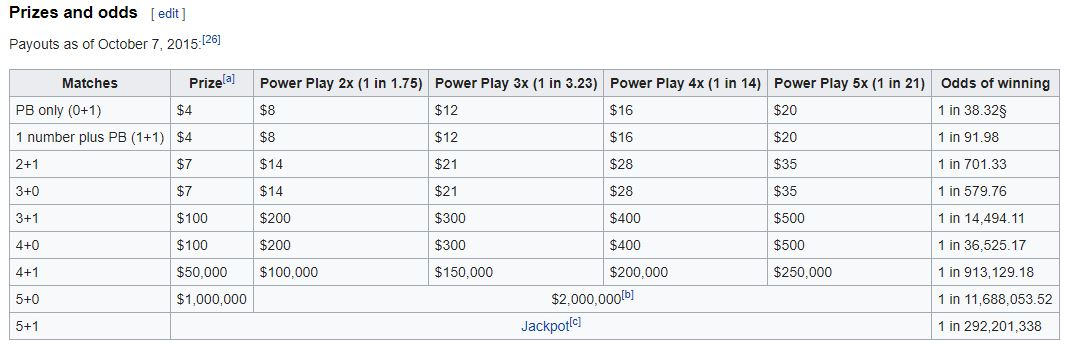

ref: [https://en.wikipedia.org/wiki/Lottery_mathematics]

So, here we find that the if we ignore the match for PowerBall, we increase the probability of winning, but for less money

### We will look at the distribution of numbers

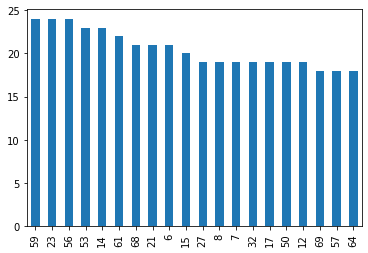

In [159]:
p=numDf.value_counts().nlargest(20).plot(kind='bar')

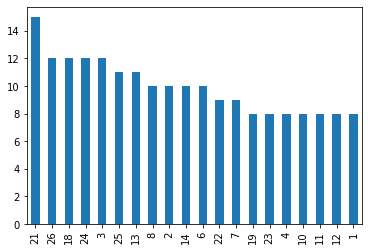

In [160]:
redDf.value_counts().nlargest(20).plot(kind='bar')

In [161]:
expandedGameDf = df.copy().drop(['Date','F'],axis=1)
expandedGameDf.head()

,A,B,C,D,E
0,9,23,26,30,32
1,4,29,49,50,67
2,7,15,21,33,62
3,18,43,58,60,68
4,24,44,46,50,51


### Let us also look at the combination of Odd and Even numbers 

In [162]:
def countOdd(l):
    if len(l)==0: return 0      
    return l[0] % 2 + countOdd(l[1:])

def countEven(l):
    if len(l)==0: return 0       
    return (l[0]+1) % 2 + countEven(l[1:])

def getEvenOddCount(rowAr):
    return f'E{countEven(rowAr)}O{countOdd(rowAr)}'


In [163]:
getEvenOddCount([ 7, 22, 37, 43, 44, 22])

'E3O3'

In [164]:
expandedGameDf['OddEven']=[getEvenOddCount(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
expandedGameDf.head()

,A,B,C,D,E,OddEven
0,9,23,26,30,32,E3O2
1,4,29,49,50,67,E2O3
2,7,15,21,33,62,E1O4
3,18,43,58,60,68,E4O1
4,24,44,46,50,51,E4O1


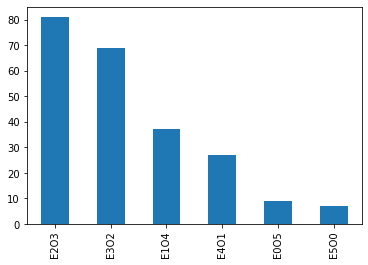

In [165]:
p=expandedGameDf['OddEven'].value_counts().plot(kind='bar')

In [166]:
totalCount = expandedGameDf.shape[0]
oddEvenCounts = expandedGameDf['OddEven'].value_counts()

oddEvenCountProb = oddEvenCounts/totalCount
print(oddEvenCountProb)


E2O3    0.352174
E3O2    0.300000
E1O4    0.160870
E4O1    0.117391
E0O5    0.039130
E5O0    0.030435
Name: OddEven, dtype: float64


### We can also look at the spread of numbers
We will split the whole set of numbers to low, mid and high range

In [167]:
g1,g2,g3,g4 = np.array_split(rangeOfGameNumbers,4)

In [168]:
print(g1)
print(g2)
print(g3)
print(g4)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36]
[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53]
[54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]


In [169]:
def countGroup(rowArr):
    g1Count = len(np.intersect1d(rowArr,g1))
    g2Count = len(np.intersect1d(rowArr,g2))
    g3Count = len(np.intersect1d(rowArr,g3))
    g4Count = len(np.intersect1d(rowArr,g4))
    
    return f'G1:{g1Count},G2:{g2Count},G3:{g3Count},G4:{g4Count}'

In [170]:
countGroup([3,4,5,6,7,8,99,45])

'G1:6,G2:0,G3:1,G4:0'

In [171]:
expandedGameDf['Spread']=[countGroup(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
expandedGameDf.head()

,A,B,C,D,E,OddEven,Spread
0,9,23,26,30,32,E3O2,"G1:1,G2:4,G3:0,G4:0"
1,4,29,49,50,67,E2O3,"G1:1,G2:1,G3:2,G4:1"
2,7,15,21,33,62,E1O4,"G1:2,G2:2,G3:0,G4:1"
3,18,43,58,60,68,E4O1,"G1:1,G2:0,G3:1,G4:3"
4,24,44,46,50,51,E4O1,"G1:0,G2:1,G3:4,G4:0"


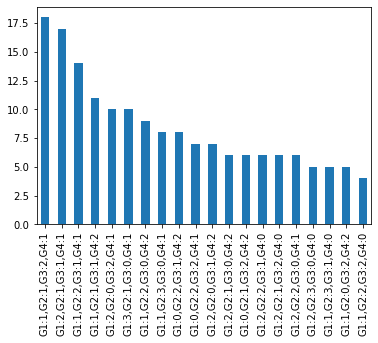

In [172]:
expandedGameDf['Spread'].value_counts().nlargest(20).plot(kind='bar')

Since none of the sections have significant count, lets combine the middle 2 sections to 1

In [173]:
def countGroupCombineMiddle(rowArr):
    g1Count = len(np.intersect1d(rowArr,g1))
    g2Count = len(np.intersect1d(rowArr,g2))
    g3Count = len(np.intersect1d(rowArr,g3))
    g4Count = len(np.intersect1d(rowArr,g4))
    
    return f'G1:{g1Count},G3:{g2Count+g3Count},G4:{g4Count}'

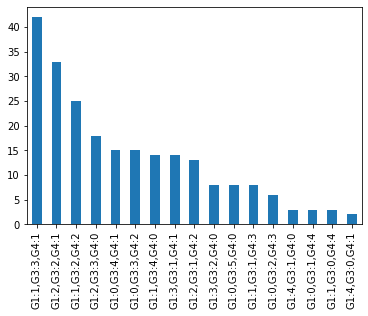

In [174]:
expandedGameDf['Spread']=[countGroupCombineMiddle(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
p=expandedGameDf['Spread'].value_counts().nlargest(20).plot(kind='bar')

We see that highest probability is G1:1,G3:3,G2:1 followed by G1:1,G3:2,G2:1 and G1:1,G3:2,G2:2. Lets look at the latter two

In [175]:
expandedGameDf.loc[expandedGameDf['Spread']=='G1:1,G3:2,G4:2']

,A,B,C,D,E,OddEven,Spread
15,11,33,44,59,67,E1O4,"G1:1,G3:2,G4:2"
28,18,42,53,62,66,E4O1,"G1:1,G3:2,G4:2"
30,15,35,42,63,68,E2O3,"G1:1,G3:2,G4:2"
34,14,22,26,55,63,E3O2,"G1:1,G3:2,G4:2"
37,15,28,46,62,64,E4O1,"G1:1,G3:2,G4:2"
40,3,20,48,54,59,E3O2,"G1:1,G3:2,G4:2"
42,14,27,29,59,65,E1O4,"G1:1,G3:2,G4:2"
56,14,41,50,56,57,E3O2,"G1:1,G3:2,G4:2"
65,14,37,47,55,67,E1O4,"G1:1,G3:2,G4:2"
68,5,26,36,64,69,E3O2,"G1:1,G3:2,G4:2"


Lets see if we expand the mid section, if we can get a better probability

In [176]:
g11 = g1[:-5]
g22 = np.append(g1[-5:],g2)
g22 = np.append(g22, g3)
g22 = np.append(g22, g4[0:5])
g33 = g4[5:]

In [177]:
print(g11)
print(g22)
print(g33)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58]
[59 60 61 62 63 64 65 66 67 68 69 70]


In [178]:
def countGroupThree(rowArr):
    g1Count = len(np.intersect1d(rowArr,g11))
    g2Count = len(np.intersect1d(rowArr,g22))
    g3Count = len(np.intersect1d(rowArr,g33))
    
    return f'G1:{g1Count},G2:{g2Count},G3:{g3Count}'

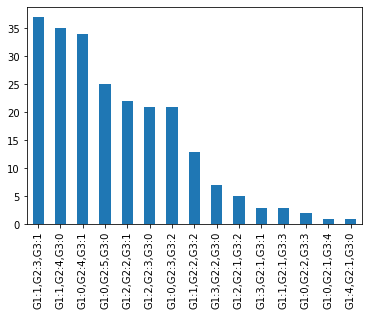

In [179]:
expandedGameDf['Spread']=[countGroupThree(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
p=expandedGameDf['Spread'].value_counts().nlargest(20).plot(kind='bar')

What if we reduce the mid section

In [180]:
g111 = np.append(g1, g2[0:5])
g222 = np.append(g2[5:],g3[:-5])
g333 = np.append(g3[-5:], g4)

In [181]:
print(g111)
print(g222)
print(g333)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]


In [182]:
def countGroupThreeLean(rowArr):
    g1Count = len(np.intersect1d(rowArr,g111))
    g2Count = len(np.intersect1d(rowArr,g222))
    g3Count = len(np.intersect1d(rowArr,g333))
    
    return f'G1:{g1Count},G2:{g2Count},G3:{g3Count}'

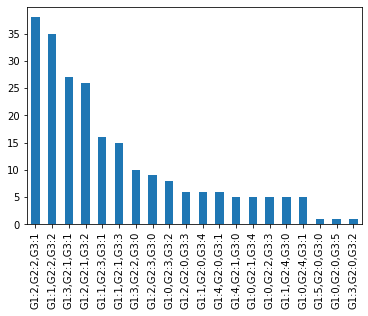

In [183]:
expandedGameDf['Spread']=[countGroupThreeLean(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
p=expandedGameDf['Spread'].value_counts().nlargest(20).plot(kind='bar')

#### Let us pick a Spread Calculation method

In [275]:
#expandedGameDf['Spread']=[countGroupCombineMiddle(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
#expandedGameDf['Spread']=[countGroupThree(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]

spreadCalculationMethod = countGroupCombineMiddle

expandedGameDf['Spread']=[spreadCalculationMethod(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]

In [276]:
expandedGameDf.head()

,A,B,C,D,E,OddEven,Spread,Fadic
0,9,23,26,30,32,E3O2,"G1:1,G3:4,G4:0",3
1,4,29,49,50,67,E2O3,"G1:1,G3:3,G4:1",1
2,7,15,21,33,62,E1O4,"G1:2,G3:2,G4:1",3
3,18,43,58,60,68,E4O1,"G1:1,G3:1,G4:3",4
4,24,44,46,50,51,E4O1,"G1:0,G3:5,G4:0",8


In [277]:
spreadCounts = expandedGameDf['Spread'].value_counts()
spreadCountProb = spreadCounts/totalCount

print(spreadCountProb)

G1:1,G3:3,G4:1    0.182609
G1:2,G3:2,G4:1    0.143478
G1:1,G3:2,G4:2    0.108696
G1:2,G3:3,G4:0    0.078261
G1:0,G3:4,G4:1    0.065217
G1:0,G3:3,G4:2    0.065217
G1:1,G3:4,G4:0    0.060870
G1:3,G3:1,G4:1    0.060870
G1:2,G3:1,G4:2    0.056522
G1:3,G3:2,G4:0    0.034783
G1:0,G3:5,G4:0    0.034783
G1:1,G3:1,G4:3    0.034783
G1:0,G3:2,G4:3    0.026087
G1:4,G3:1,G4:0    0.013043
G1:0,G3:1,G4:4    0.013043
G1:1,G3:0,G4:4    0.013043
G1:4,G3:0,G4:1    0.008696
Name: Spread, dtype: float64


### Let's look at distribution of fadic numbers

In [278]:
def getFadicNumber(rowArr):
    n = rowArr.copy()
    while len(n) > 1:
        res = sum(int(c) for c in n)
        n = [x for x in str(res)]
    return n[0]
    
print(getFadicNumber([1,2,3,4,5,6]))

3


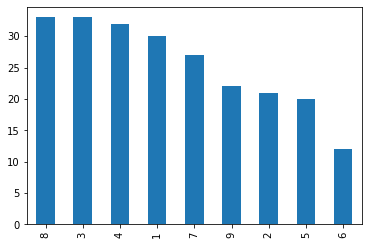

In [279]:
expandedGameDf['Fadic']=[getFadicNumber(row.values) for idx, row in expandedGameDf.loc[:,['A','B','C','D','E']].iterrows()]
p=expandedGameDf['Fadic'].value_counts().plot(kind='bar')

In [280]:
fadicCounts = expandedGameDf['Fadic'].value_counts()
fadicProb = fadicCounts/totalCount

print(fadicProb)

8    0.143478
3    0.143478
4    0.139130
1    0.130435
7    0.117391
9    0.095652
2    0.091304
5    0.086957
6    0.052174
Name: Fadic, dtype: float64


## Let us play!
 

In [364]:
mostProbableNums = numDf.value_counts().nlargest(40).index#[10:-10]
mostProbableReds = redDf.value_counts().nlargest(20).index

In [365]:
print(mostProbableNums)
print(mostProbableReds)

Int64Index([59, 23, 56, 53, 14, 61, 68, 21,  6, 15, 27,  8,  7, 32, 17, 50, 12,
            69, 57, 64, 29,  3, 42, 43, 45,  9, 25, 24, 20, 36,  5,  1, 39, 67,
            62, 41, 38, 47, 37, 26],
           dtype='int64')
Int64Index([21, 26, 18, 24, 3, 25, 13, 8, 2, 14, 6, 22, 7, 19, 23, 4, 10, 11,
            12, 1],
           dtype='int64')


In [366]:
predCombinations = [ i for i in combinations(mostProbableNums,5)]
len(predCombinations)

658008

In [367]:
predDf = pd.DataFrame(predCombinations)
predDf.columns = ['A','B','C','D','E']
predDf.head()

,A,B,C,D,E
0,59,23,56,53,14
1,59,23,56,53,61
2,59,23,56,53,68
3,59,23,56,53,21
4,59,23,56,53,6


In [368]:
predDf['OddEven']=[getEvenOddCount(row.values) for idx, row in predDf.loc[:,['A','B','C','D','E']].iterrows()]
predDf['Spread']=[spreadCalculationMethod(row.values) for idx, row in predDf.loc[:,['A','B','C','D','E']].iterrows()]
predDf['Fadic']=[getFadicNumber(row.values) for idx, row in predDf.loc[:,['A','B','C','D','E']].iterrows()]

predDf.head()

,A,B,C,D,E,OddEven,Spread,Fadic
0,59,23,56,53,14,E2O3,"G1:1,G3:2,G4:2",7
1,59,23,56,53,61,E1O4,"G1:0,G3:2,G4:3",9
2,59,23,56,53,68,E2O3,"G1:0,G3:2,G4:3",7
3,59,23,56,53,21,E1O4,"G1:0,G3:3,G4:2",5
4,59,23,56,53,6,E2O3,"G1:1,G3:2,G4:2",8


In [286]:
def getEvenOddCountProbability(row):
    rowOddEvenVal = row['OddEven']
    return oddEvenCountProb[rowOddEvenVal] if oddEvenCountProb.index.isin([rowOddEvenVal]).any() else 0

def getSpreadProbability(row):
    rowSpreadVal = row['Spread']
    return spreadCountProb[rowSpreadVal] if spreadCountProb.index.isin([rowSpreadVal]).any() else 0

def getFadicProbability(row):
    rowFadicval = row['Fadic']
    return fadicProb[rowFadicval] if fadicProb.index.isin([rowFadicval]).any() else 0
    return fadicProb[rowFadicval]
    
print(getEvenOddCountProbability(predDf.loc[0]))
print(getSpreadProbability(predDf.loc[0]))
print(getFadicProbability(predDf.loc[0]))


0.3521739130434783
0.034782608695652174
0.13043478260869565


In [287]:
predDf['OddEvenProb']=[getEvenOddCountProbability(row) for idx, row in predDf.iterrows()]
predDf['SpreadProb']=[getSpreadProbability(row) for idx, row in predDf.iterrows()]
predDf['FadicProb']=[getFadicProbability(row) for idx, row in predDf.iterrows()]

predDf.head()

,A,B,C,D,E,OddEven,Spread,Fadic,OddEvenProb,SpreadProb,FadicProb
0,27,8,7,32,17,E2O3,"G1:3,G3:2,G4:0",1,0.352174,0.034783,0.130435
1,27,8,7,32,50,E3O2,"G1:2,G3:3,G4:0",7,0.300000,0.078261,0.117391
2,27,8,7,32,12,E3O2,"G1:3,G3:2,G4:0",5,0.300000,0.034783,0.086957
3,27,8,7,32,69,E2O3,"G1:2,G3:2,G4:1",8,0.352174,0.143478,0.143478
4,27,8,7,32,57,E2O3,"G1:2,G3:2,G4:1",5,0.352174,0.143478,0.086957


In [354]:
#predDf['WinProb'] = predDf['SpreadProb'] #+ predDf['OddEvenProb'] + predDf['FadicProb']
#predDf['WinProb'] = 3 * predDf['SpreadProb'] + 2* predDf['OddEvenProb'] + 1 * predDf['FadicProb']
#predDf['WinProb'] = predDf['SpreadProb'] * predDf['OddEvenProb'] * predDf['FadicProb']
predDf = predDf.loc[predDf['Spread']=='G1:1,G3:3,G4:1']
predDf['WinProb'] = predDf['OddEvenProb'] + predDf['FadicProb']
predDf.head()

,A,B,C,D,E,OddEven,Spread,Fadic,OddEvenProb,SpreadProb,FadicProb,WinProb
152,27,8,32,50,69,E3O2,"G1:1,G3:3,G4:1",6,0.300000,0.182609,0.052174,0.352174
153,27,8,32,50,57,E3O2,"G1:1,G3:3,G4:1",3,0.300000,0.182609,0.143478,0.443478
154,27,8,32,50,64,E4O1,"G1:1,G3:3,G4:1",1,0.117391,0.182609,0.130435,0.247826
180,27,8,32,69,29,E2O3,"G1:1,G3:3,G4:1",3,0.352174,0.182609,0.143478,0.495652
182,27,8,32,69,42,E3O2,"G1:1,G3:3,G4:1",7,0.300000,0.182609,0.117391,0.417391


In [363]:
predSorted = predDf.sort_values('WinProb',ascending=False).reset_index(drop=True)
predSorted.head(50)

,A,B,C,D,E,OddEven,Spread,Fadic,OddEvenProb,SpreadProb,FadicProb,WinProb
0,57,3,25,24,20,E2O3,"G1:1,G3:3,G4:1",3,0.352174,0.182609,0.143478,0.495652
1,27,7,50,57,24,E2O3,"G1:1,G3:3,G4:1",3,0.352174,0.182609,0.143478,0.495652
2,50,57,3,45,24,E2O3,"G1:1,G3:3,G4:1",8,0.352174,0.182609,0.143478,0.495652
3,27,12,69,29,24,E2O3,"G1:1,G3:3,G4:1",8,0.352174,0.182609,0.143478,0.495652
4,27,17,50,64,25,E2O3,"G1:1,G3:3,G4:1",3,0.352174,0.182609,0.143478,0.495652
5,8,69,45,25,36,E2O3,"G1:1,G3:3,G4:1",3,0.352174,0.182609,0.143478,0.495652
6,27,12,69,29,42,E2O3,"G1:1,G3:3,G4:1",8,0.352174,0.182609,0.143478,0.495652
7,64,3,45,25,24,E2O3,"G1:1,G3:3,G4:1",8,0.352174,0.182609,0.143478,0.495652
8,27,32,17,69,20,E2O3,"G1:1,G3:3,G4:1",3,0.352174,0.182609,0.143478,0.495652
9,17,57,43,24,20,E2O3,"G1:1,G3:3,G4:1",8,0.352174,0.182609,0.143478,0.495652


In [360]:
predictions = predSorted#.loc[predSorted['WinProb'] == predSorted.loc[0,'WinProb']]
predList = predictions.loc[:,['A','B','C','D','E']]
predList

,A,B,C,D,E
0,57,3,25,24,20
1,27,7,50,57,24
2,50,57,3,45,24
3,27,12,69,29,24
4,27,17,50,64,25
...,...,...,...,...,...
2965,27,57,29,3,25
2966,50,12,64,24,36
2967,32,12,64,24,36
2968,50,12,64,42,36


In [361]:
predList.shape

(2970, 5)

In [362]:
pricePaid = predList.shape[0] * 3

winningNumbers = [5,9,27,39,42]

def calcPrizeAmount(matchingNumbers):
    numMatching = len(matchingNumbers)
    if numMatching==3:
        return 7
    elif numMatching==4:
        return 100
    elif numMatching==5:
        return 1000000
    else:
        return 0

prizeMoney = np.sum([calcPrizeAmount(np.intersect1d(row.values,winningNumbers)) for idx,row in predList.iterrows()])

print(f'Woohoo! You won {prizeMoney} dollars! You spent {pricePaid} dollars')

Woohoo! You won 189 dollars! You spent 8910 dollars
